# Project: Investigate a Dataset - TMDb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this report, I will be analysing `tmdb-movies.csv`. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

The dataset contains the following columns:
- `id`: an integer representing the unique ID for the movie within the dataset.
- `imdb_id`: a string representing the movie's ID on IMDB (if available).
- `popularity`: a float representing Popularity score for the movie on TMDB.
- `budget`: an integer representing the budget of the movie in USD.
- `revenue`: an integer representing the revenue of the movie in USD.
- `original_title`: a string representing original title of the movie.
- `cast`: The cast of the movie containing multiple values separated by `|`.
- `homepage`: a string representing the URL of the official website of the movie.
- `director`: a string representing the name of the direction of the movie.
- `tagline`: a string representing the tagline of the movie, which is a short phrase or sentence used to advertise the film and capture the audience's attention.
- `keywords`: The keywords associated with the movie separated by `|`.
- `overview`: a string representing a short summary of the movie plot.
- `runtime`: an integer representing the runtime of the movie in minutes.
- `genres`: The list of genres the movies belongs to separated by `|`.
- `production_companies`: The list of companies that produced the movie separated by `|`.
- `release_date`: The release date of the movie in format month/day/year.
- `vote_count`: an integer representing the vote count of the movie.
- `vote_average`: a float representing the average votes of the movie.
- `release_year`: The year of release of the movie.
- `budget_adj`: The budget of the movie in terms of 2010 USD, accounting for inflation over time.
- `revenue_adj`: The revenue of the movie in terms of 2010 USD, accounting for inflation over time.

### Question(s) for Analysis
#### The aim of this analysis is to answer questions including:
1. <a href="#q1">What movie lengths are most liked by audiences according to their popularity?</a>
2. <a href="#q2">Is a higher budget associated with a higher revenue?</a>
3. <a href="#q3">Who holds the record for the most frequent appearances in movies?</a>
4. <a href="#q4">Which movies has the highest and lowest profit?</a>
5. <a href="#q5">Which genres were produced the most and which were the most popular?</a>
6. <a href="#q6">Which production company has the highest # of releases over the years?</a>
7. <a href="#q7">How does runtime and vote average correlate?</a>
8. <a href="#q8">Which day of week does have the highest number of releases?</a>
9. <a href="#q9">How do budget and release year together affect revenue?</a>

<strong>Note</strong>: to navigate directly to the answer of the question, click on it.

In [145]:
# import the packages to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# magic word for matplotlib inline plotting.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load the dataset.

In [146]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

Display a few records of the dataset.

In [147]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Show how many rows (records) and columns (attributes) in the dataset.

In [148]:
print(f'This dataset has: {df.shape[0]} records and {df.shape[1]} attributes')

This dataset has: 10866 records and 21 attributes


As we can see, this data set has 10866 records and 21 attributes.

Display information about the dataset, including attribute names, non-null count and data types
using `DataFrame.info()` method.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Display how many null values present for each attribute.

In [150]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Display the number of unique values for each attribute.

In [151]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Display some statistics for the both numerical and non-numeric data.

In [152]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here we can notice that we have movies with zero budget, movies with zero runtime.

In [153]:
df.describe(include=object)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28



### Data Cleaning 

#### Duplication Handling

Check for duplicate records using `DataFrame.duplicated()` method.

In [154]:
sum(df.duplicated())

1

There is duplication, This duplication will be deleted using `DataFrame.drop_duplicates()` method.

In [155]:
df.drop_duplicates(inplace=True)

Now check the new number of records.

In [156]:
df.shape[0]

10865

As we can see, it decreased from 10866 to 10865.

#### Drop attribute with no use

The attributes `id`, `imdb_id`, `budget_adj`, `revenue_adj`, `overview`,`homepage`, `tagline` won't be used in out case, they will be dropped.

In [157]:
df.drop(
    ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'overview', 'homepage', 'tagline', 'keywords'],
    axis=1,
    inplace=True)

Let's see the new dataframe structure.

In [158]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [160]:
# The new number of columns.
df.shape[1]

13

#### Dealing with null values.

Let's again examine the count of null values in the dataset.

In [161]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

For the `cast` attribute, replace the null values with 'Unknown cast' string.
an empty string for example would not have meaning in the case.

In [162]:
df['cast'].fillna('Unknown cast', inplace=True)

For the `director` attribute, replace the null values with 'Unknown director' string.
an empty string for example would not have meaning in the case.

In [163]:
df['director'].fillna('Unknown director', inplace=True)

For the `genres` attribute, replace the null values with 'Unknown genre' string.
an empty string for example would not have meaning in the case.

In [164]:
df['genres'].fillna('Unknown genre', inplace=True)

For the `production_companies` attribute, replace the null values with 'Unknown production company' 
string. an empty string for example would not have meaning in the case.

In [165]:
df['production_companies'].fillna('Unknown production company', inplace=True)

#### Dealing with multi-value attributes

For a multi-value attribute, I will split it, trim, capitalize, and
make all of the values distinct in each entry.

This process ensures consistence and prevents wrong results due to 
variations in string case (uppercase, lowercase, etc...)
and duplicates.

For this sections, `cast`, `genres`, and `production_companies` 
attributes will be process.

Here, we define a function to split these strings, trim and capitalize the output, and return the distinct values in each string.

In [166]:
def split_and_capitalize_unique(string, delimiter='|'):
    """
    Splits a given string by a specified delimiter, trims and capitalizes each resulting word, 
    and returns a list of distinct words.

    Parameters:
        string (str): The input string to be split and processed.
        delimiter (str, optional): The delimiter to use for splitting the string. Default is '|'.

    Returns:
        An array of distinct, capitalized words obtained from the input string.

    Examples:
    >>> split_and_capitalize_unique("apple|banana|Apple|orange|banana")
    ['Apple', 'Banana', 'Orange']

    >>> split_and_capitalize_unique("cat, dog, cat", delimiter=',')
    ['Cat', 'Dog']
    """
    
    return np.array(list({word.strip().capitalize() for word in string.split(delimiter)}))

Now do the split for the latter mentioned attributes.

In [167]:
for attr in ['cast', 'genres', 'production_companies']:
    df[attr] = df[attr].apply(split_and_capitalize_unique)

Now Let's see the new form of the data.

In [168]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,"[Vincent d'onofrio, Bryce dallas howard, Chris...",Colin Trevorrow,124,"[Action, Thriller, Science fiction, Adventure]","[Legendary pictures, Fuji television network, ...",6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Nicholas hoult, Tom hardy, Charlize theron, J...",George Miller,120,"[Action, Thriller, Science fiction, Adventure]","[Village roadshow pictures, Kennedy miller pro...",5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Theo james, Ansel elgort, Miles teller, Kate ...",Robert Schwentke,119,"[Thriller, Science fiction, Adventure]","[Summit entertainment, Mandeville films, Red w...",3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Adam driver, Daisy ridley, Mark hamill, Carri...",J.J. Abrams,136,"[Fantasy, Action, Science fiction, Adventure]","[Bad robot, Lucasfilm, Truenorth productions]",12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Vin diesel, Dwayne johnson, Paul walker, Mich...",James Wan,137,"[Action, Thriller, Crime]","[Original film, Dentsu, Media rights capital, ...",4/1/15,2947,7.3,2015


#### Dealing with attributes that have unreasonable values

As we noticed earlier, we have movie that have 0 budget and movies with 0 runtime, 
Let's deal with this.

For `runtime`, let's get the total count of movies that has 0 runtime it.

In [169]:
len(df[df['runtime'] == 0])

31

As we can see, a few records of the total # of records have a runtime value of zero, we can 
fill the missing value with the mean of runtimes, as the value of 0 for the runtime means that the movie does not have any content, which is impossible.

In [170]:
# Calulate the mean of non-zero runtime.
mean = np.mean(df[df['runtime'] > 0]['runtime'])

# assign the calculated mean to each zero value of runtime.
df['runtime'] = np.where(df['runtime'] == 0, mean, df['runtime'])

Let's check again for zero values for runtime.

In [171]:
len(df[df['runtime'] == 0])

0

For the `budget`, there are values of zero, but for a movie, its budget could be zero.
Let's count the number of zero budget values.

In [172]:
len(df[df['budget'] == 0])

5696

That is a high number of zero, representing roughly 50% of the data.

replacing these values with the mean would introduce biasing and skewness in the data and the results would not reflect the real thing.

As the case of zero budget is rare, I will mark these 0 budgets as `pd.NA` value (representing null), to not affect the analysis.

In [173]:
df['budget'] = np.where(df['budget'] == 0, np.nan, df['budget'])

Let's check for the number of zeros fot the budget attribute.

In [174]:
len(df[df['budget'] == 0])

0

<em>For "outlier" (in mathematical terms), the values of them are reasonable and removing them
would affect the results, so I decided to keep them.</em>

#### Datatypes conversion and space optimization.

And let's look at the datatypes using `DataFrame.dtypes` attribute.

In [175]:
df.dtypes

popularity              float64
budget                  float64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

First, let's consider the numeric datatypes.

Let's display statistics again using `DataFrame.describe()` method.

In [176]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,5.169000e+03,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,3.073958e+07,3.982690e+07,102.363855,217.399632,5.975012,2001.321859
std,1.000231,3.890441e+07,1.170083e+08,30.904039,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.207575,6.000000e+06,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,1.700000e+07,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,4.000000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


for `release_year` attribute, the range is [1960, 2015] inclusive => `int16` type is sufficient.

for `vote_count` attribute, the range is [10, 9767] inclusive => `int16` type is sufficient.

for `revenue` attribute, the range is [0, 2.781506e+09] inclusive => keep `int64`.

for `budget` attribute, the range is [1, 4.250000e+08] inclusive => `int32` is sufficient.

for `runtime` attribute, the range is [2, 900] inclusive => `int16` is sufficient.

for floating point types (rest of the attributes), I think 7 decimal places precision is good =>
I will choose `float32` type for them.


Now let's do the conversion

In [177]:
df['release_year'] = df['release_year'].astype('int16')

In [178]:
df['vote_count'] = df['vote_count'].astype('int16')

In [179]:
df['budget'] = df['budget'].astype(pd.Int32Dtype()) # For null values error prevention

In [180]:
df['runtime'] = df['runtime'].astype('int16')

In [181]:
df['vote_average'] = df['vote_average'].astype('float32')

In [182]:
df['popularity'] = df['popularity'].astype('float32')

Now, let's consider the non-numeric datatypes.

`cast`, `genres`, `production_companies` are already process.

Let's consider the rest of the attributes.

In [183]:
df[['original_title', 'director', 'release_date']].describe()

,original_title,director,release_date
count,10865,10865,10865
unique,10571,5068,5909
top,Hamlet,Woody Allen,1/1/09
freq,4,45,28


As we can see, the number of unique values is not small, therefore, conversion to `category` type
if not a wise choice.

For the `release_date` attribute, let's convert it to be able to deal with it in an easy way.

But before conversion, let's check for the consistency in format (will be required after a little bit).

In [184]:
df[df['release_date'].str.match(r'^(?!(\d{1,2}/\d{1,2}/\d{2}))$')]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


as we can see, all of the dates following the same format (month/day/year (2 digits)).

Now, let's check if the year in date is consistent with its correspong value in `release_year`

In [185]:
# Split the release_date and take the last part of the split (year),
# compare it to the last 2 digits of the release_year attribute.

df[df['release_date'].str.split('/').str[-1].astype('int') != df['release_year'] % 100]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


As we can see, all of the values are consistent.

Now, the conversion process.

The year in the converted date is chosen to be the value in the `release_year` attribute, as it
provide a more clear context (addition 2 digits).

Let's define a function that will take a record in a dataframe, extract the required information,
and then convert to the required date object.

In [186]:
def get_date(record):
    year = record['release_year']
    
    month, day = record['release_date'].split('/')[0:2]
    
    return pd.to_datetime(f'{day}/{month}/{year}', format='%d/%m/%Y')

In [187]:
df['release_date'] = df[['release_year', 'release_date']].apply(get_date, axis=1)

Let's take a look at the data.

In [188]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985764,150000000,1513528810,Jurassic World,"[Vincent d'onofrio, Bryce dallas howard, Chris...",Colin Trevorrow,124,"[Action, Thriller, Science fiction, Adventure]","[Legendary pictures, Fuji television network, ...",2015-06-09,5562,6.5,2015
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Nicholas hoult, Tom hardy, Charlize theron, J...",George Miller,120,"[Action, Thriller, Science fiction, Adventure]","[Village roadshow pictures, Kennedy miller pro...",2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Theo james, Ansel elgort, Miles teller, Kate ...",Robert Schwentke,119,"[Thriller, Science fiction, Adventure]","[Summit entertainment, Mandeville films, Red w...",2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Adam driver, Daisy ridley, Mark hamill, Carri...",J.J. Abrams,136,"[Fantasy, Action, Science fiction, Adventure]","[Bad robot, Lucasfilm, Truenorth productions]",2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Vin diesel, Dwayne johnson, Paul walker, Mich...",James Wan,137,"[Action, Thriller, Crime]","[Original film, Dentsu, Media rights capital, ...",2015-04-01,2947,7.3,2015


Now, we can drop the `release_year` attribute since we have the date object.

In [189]:
df.drop(['release_year'], axis=1, inplace=True)

Now, check if one of the `release_date` values is in the future (which is not reasonable).

In [190]:
current_date = pd.Timestamp(datetime.now())

df[df['release_date'] > current_date]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average


As we can see, no future dates.

Let's look at our data.

In [191]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average
0,32.985764,150000000,1513528810,Jurassic World,"[Vincent d'onofrio, Bryce dallas howard, Chris...",Colin Trevorrow,124,"[Action, Thriller, Science fiction, Adventure]","[Legendary pictures, Fuji television network, ...",2015-06-09,5562,6.5
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Nicholas hoult, Tom hardy, Charlize theron, J...",George Miller,120,"[Action, Thriller, Science fiction, Adventure]","[Village roadshow pictures, Kennedy miller pro...",2015-05-13,6185,7.1
2,13.112507,110000000,295238201,Insurgent,"[Theo james, Ansel elgort, Miles teller, Kate ...",Robert Schwentke,119,"[Thriller, Science fiction, Adventure]","[Summit entertainment, Mandeville films, Red w...",2015-03-18,2480,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Adam driver, Daisy ridley, Mark hamill, Carri...",J.J. Abrams,136,"[Fantasy, Action, Science fiction, Adventure]","[Bad robot, Lucasfilm, Truenorth productions]",2015-12-15,5292,7.5
4,9.335014,190000000,1506249360,Furious 7,"[Vin diesel, Dwayne johnson, Paul walker, Mich...",James Wan,137,"[Action, Thriller, Crime]","[Original film, Dentsu, Media rights capital, ...",2015-04-01,2947,7.3


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float32       
 1   budget                5169 non-null   Int32         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10865 non-null  object        
 5   director              10865 non-null  object        
 6   runtime               10865 non-null  int16         
 7   genres                10865 non-null  object        
 8   production_companies  10865 non-null  object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int16         
 11  vote_average          10865 non-null  float32       
dtypes: Int32(1), datetime64[ns](1), float32(2), int16(2), int64(1), object(5)


Now, all things is set and clean, let's get into our EDA.

<a id='eda'></a>
## Exploratory Data Analysis

#### Here, we answer out research questions.

<a id='q1'></a>
### Research Question 1: What movie lengths are most liked by audiences according to their popularity?

let's draw a lineplot to observe the average popularity for runtimes.

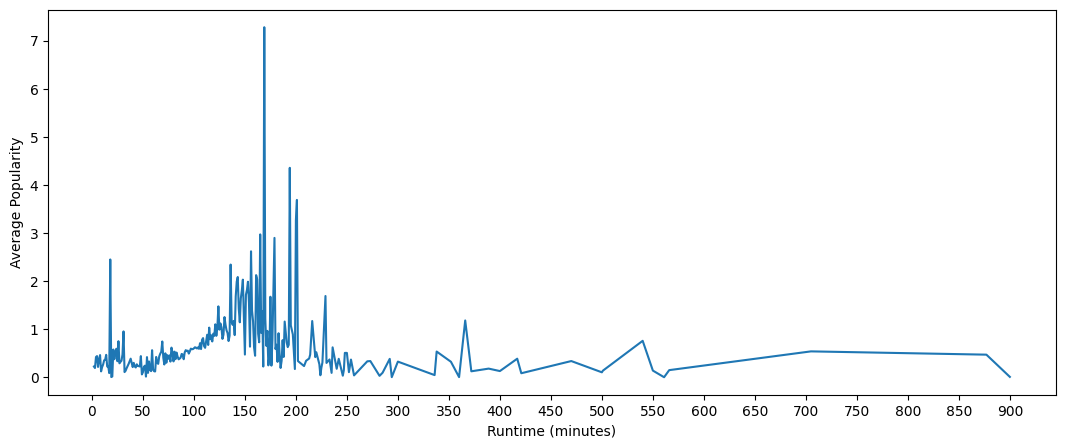

In [193]:
avg_popularity_for_runtime = df.groupby('runtime')['popularity'].mean().reset_index()

plt.figure(figsize=(13, 5))

plt.xlabel('Runtime (minutes)')

plt.ylabel('Average Popularity')

plt.xticks(np.arange(0, 1000, 50))

sns.lineplot(data=avg_popularity_for_runtime, x='runtime', y='popularity');

> As we can observe, The most preferred (popular) runtimes lies between 150 and 200 minute.

<a id='q2'></a>
### Research Question 2:  Is a higher budget associated with a higher revenue?

Let's draw a scatter plot for this problem to shiow the relationship between these 2 attributes.

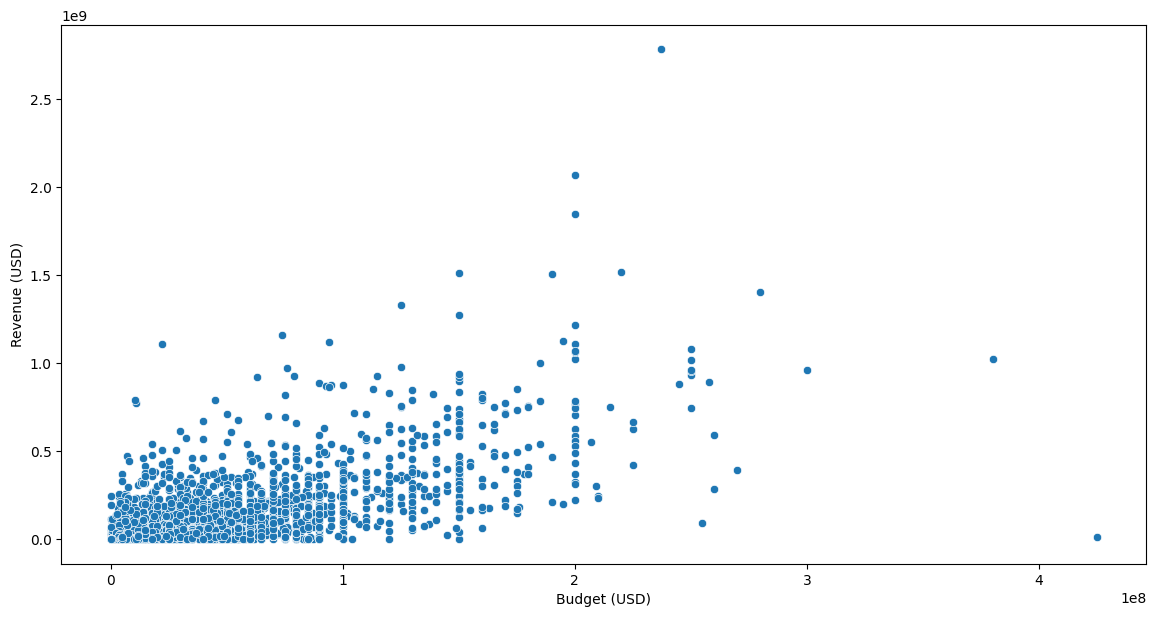

In [194]:
plt.figure(figsize=(14, 7))

plt.xlabel('Budget (USD)')

plt.ylabel('Revenue (USD)')

sns.scatterplot(data=df, x='budget', y='revenue');

> As we can observe, there is positive relationship between the `budget` and `revenue` attributes,
therefore, a higher budget corresponds to a higher revenue.

We can also calculate the correlation between these two attributes to represent our result in a
mathematical way.

In [195]:
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.700162
revenue,0.700162,1.000000


As we can see, a positive high correlation value, this corresponds to out result.

<a id='q3'></a>

### Research Question 3: Who holds the record for the most frequent appearances in movies?

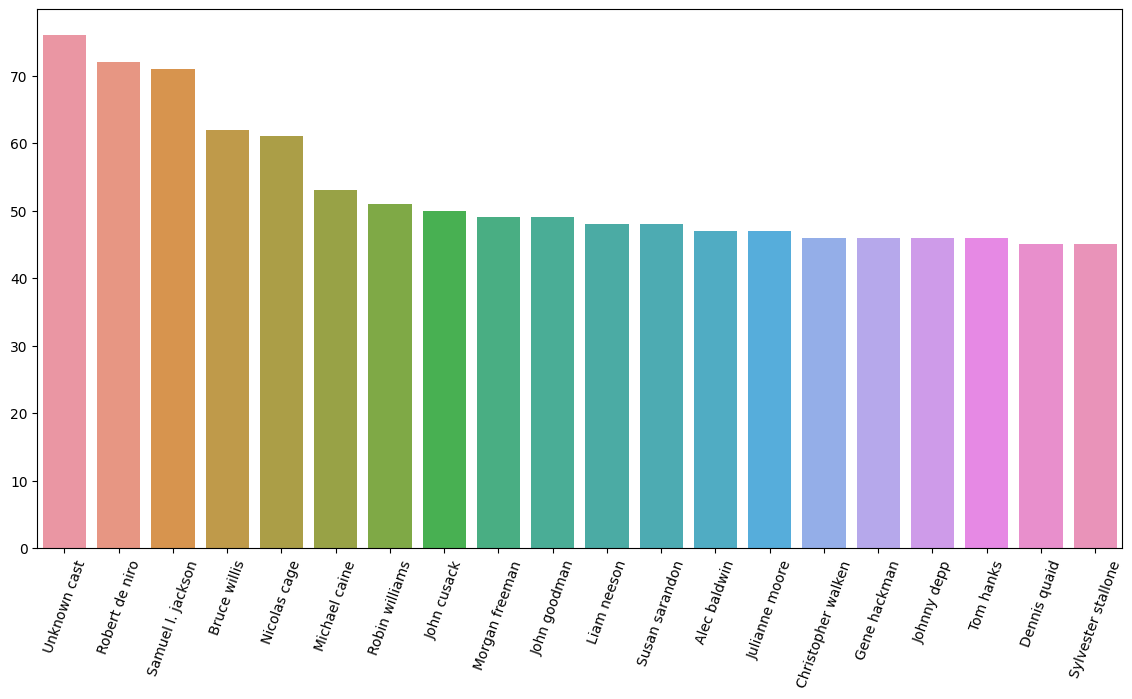

In [196]:
cast_counts_top_20 = df['cast'].explode().value_counts()[:20]

plt.figure(figsize=(14, 7))

plt.xticks(rotation=70)

sns.barplot(x=cast_counts_top_20.index, y=cast_counts_top_20.values);

In [197]:
cast_counts_top_20

Unknown cast          76
Robert de niro        72
Samuel l. jackson     71
Bruce willis          62
Nicolas cage          61
Michael caine         53
Robin williams        51
John cusack           50
Morgan freeman        49
John goodman          49
Liam neeson           48
Susan sarandon        48
Alec baldwin          47
Julianne moore        47
Christopher walken    46
Gene hackman          46
Johnny depp           46
Tom hanks             46
Dennis quaid          45
Sylvester stallone    45
Name: cast, dtype: int64

> Ignoring 'Unknown cast', 'Robert de niro' holds the record for the most frequent appearances in movies with a frequency of 72.

<a id='q4'></a>
### Research Question 4: Which movies has the highest and lowest profit?

For this question, Let's establish `profit` attribute which equals to the revenue minus the budget.

In [198]:
df['profit'] = df['revenue'] - df['budget']

Now, let's find the movies with min. and max. profit.

In [199]:
min_index = df['profit'].idxmin()

max_index = df['profit'].idxmax()

print(f"The movie with highest profit is: {df['original_title'][max_index]}, with a profit of ${df['profit'][max_index]}")
print(f"The movie with lowest profit is: {df['original_title'][min_index]}, with a profit of ${df['profit'][min_index]}")

The movie with highest profit is: Avatar, with a profit of $2544505847
The movie with lowest profit is: The Warrior's Way, with a profit of $-413912431


> The movie with the highest profit is 'Avatar' with 2544505847 USD gain.

> The movie with the lowest profit is 'The Warriors Way' with 413912431 USD loss.

<a id='q5'></a>
### Research Question 5: Which genres were produced the most and which were the most popular?

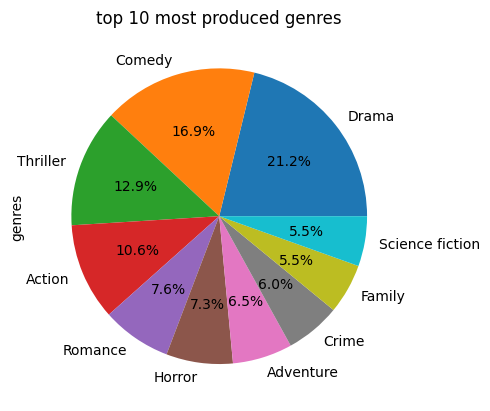

In [200]:
most_produced_genres = df['genres'].explode().value_counts()[:10]

most_produced_genres.plot(kind='pie', title='top 10 most produced genres', autopct='%.1f%%');

> As the pie plot shows, The most produced genre is Drama, then Comedy.

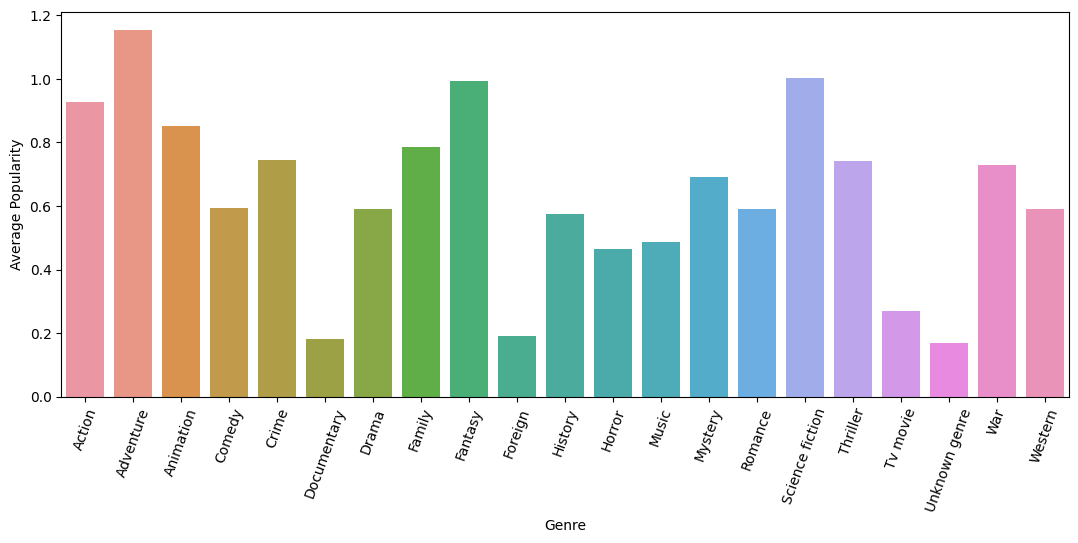

In [201]:
avg_popularity_for_genre = df.explode('genres').groupby('genres')['popularity'].mean().reset_index()

plt.figure(figsize=(13, 5))

plt.xticks(rotation=70)

sns.barplot(data=avg_popularity_for_genre, x='genres', y='popularity');

plt.xlabel('Genre')

plt.ylabel('Average Popularity')

plt.show()

> As we can observe, The most popular genre in average is 'Adventure'.

<a id='q6'></a>
### Research Question 6: Which production company has the highest # of releases over the years?

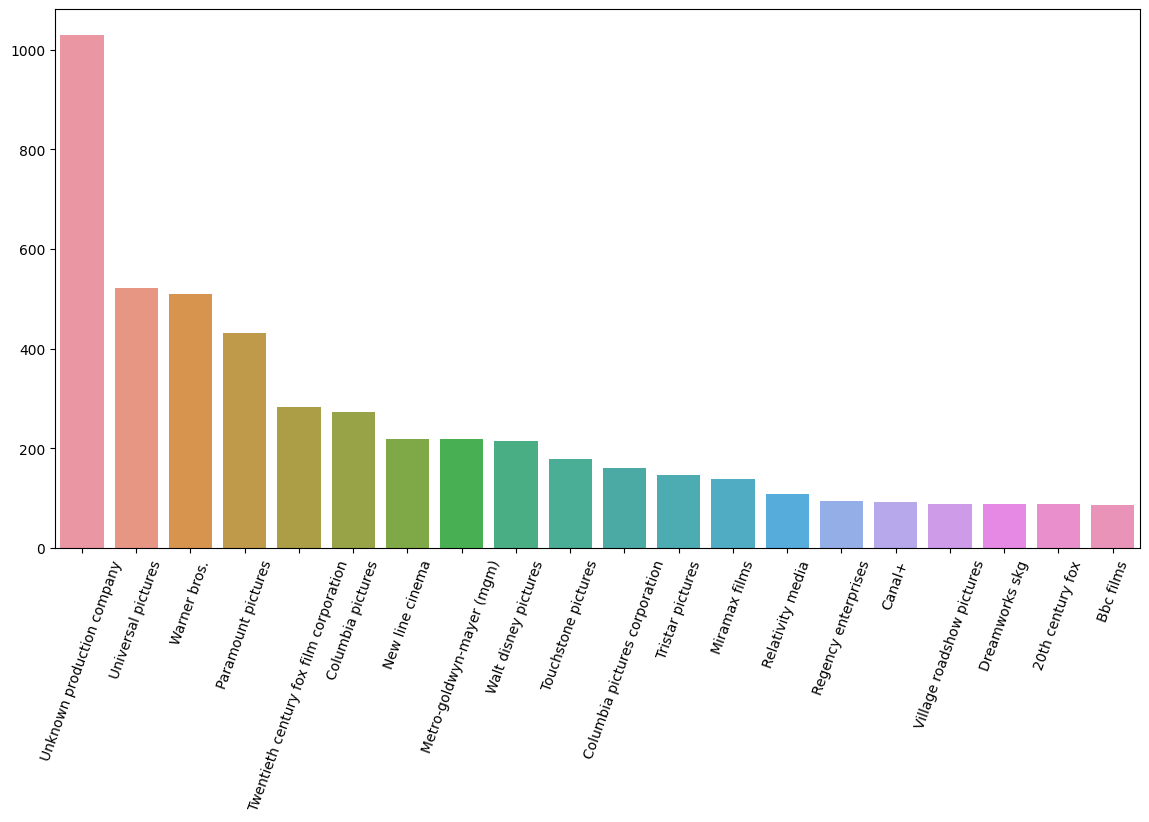

In [202]:
top_20_companies_releases = df['production_companies'].explode().value_counts()[:20]

plt.figure(figsize=(14, 7))

plt.xticks(rotation=70)

sns.barplot(x=top_20_companies_releases.index, y=top_20_companies_releases.values);

> Ignoring 'Unknown production company', The company with the highest number of releases is 'Universal prictures'.

<a id="q7"></a>
### Research Question 7: How does runtime and vote average correlate?

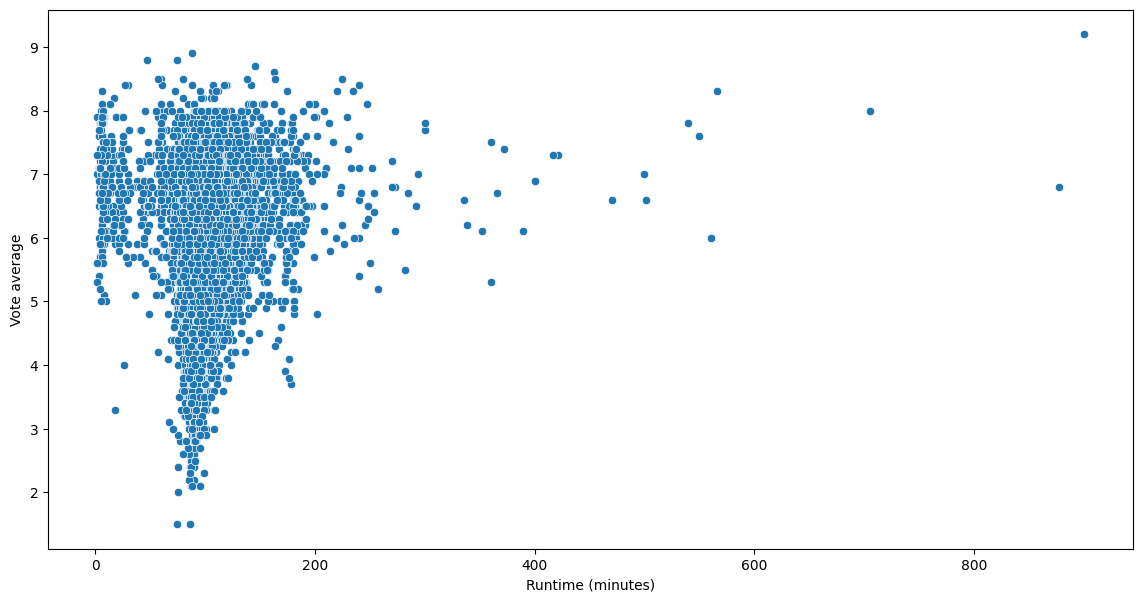

In [203]:
plt.figure(figsize=(14, 7))

sns.scatterplot(data=df, x='runtime', y='vote_average');

plt.xlabel('Runtime (minutes)')

plt.ylabel('Vote average')

plt.show()

> As we can observe, there is positive relationship between the `vote_average` and `runtime` attributes.

<a id="q8"></a>
### Research Question 8: Which day of week does have the highest number of releases?

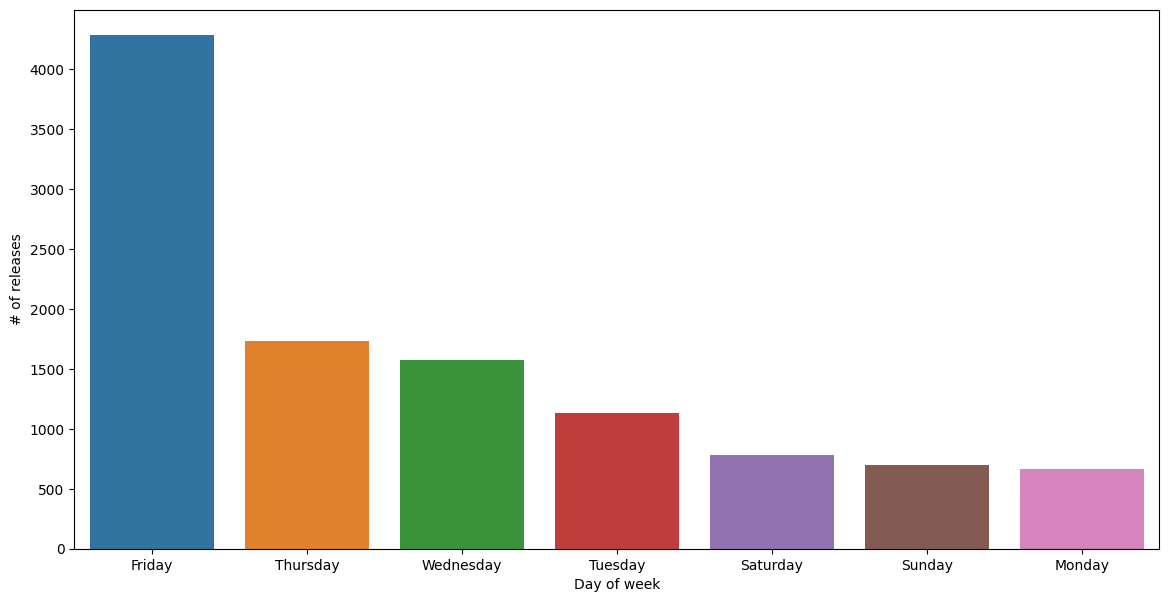

In [204]:
release_counts = df['release_date'].dt.day_name().value_counts()

plt.figure(figsize=(14, 7))

plt.xlabel('Day of week')

plt.ylabel('# of releases')

sns.barplot(x=release_counts.index, y=release_counts.values);

> As we can observe, Friday has the most number of releases, as it is either a weekend or prior to a weekend.

<a id="q9"></a>
### Research Question 9: How do budget and release year together affect revenue?

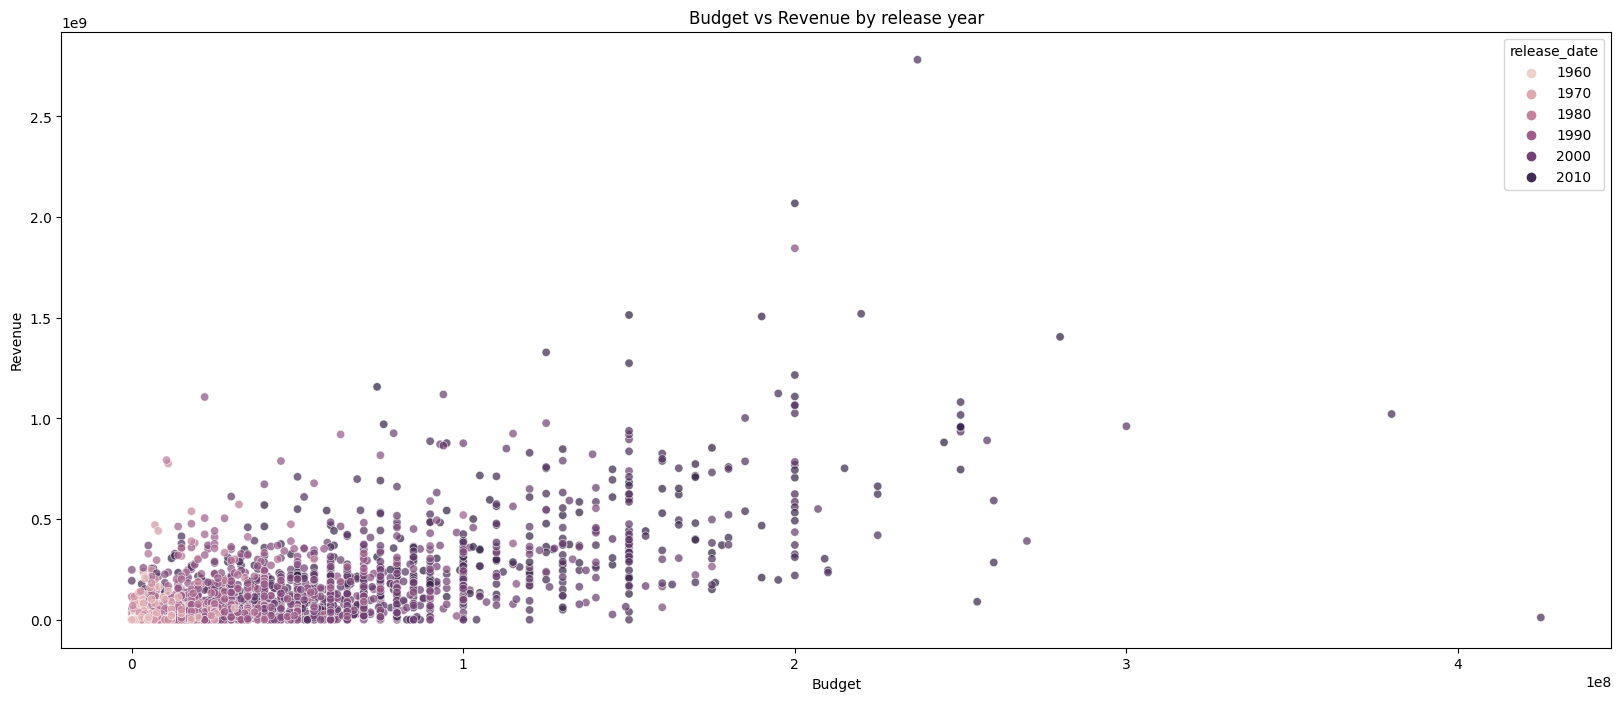

In [205]:
plt.figure(figsize=(20, 8))

plt.title('Budget vs Revenue by release year')

plt.xlabel('Budget')

plt.ylabel('Revenue')

sns.scatterplot(data=df, x='budget', y='revenue', hue=df['release_date'].dt.year, alpha=0.7);

> The `revenue` and `budget` attribute are generally positive correlated, but, As we can observe from the scatter plot, as the time passes (release year increases), the `revenue` and `budget` increase as well.

> We can say that (budget, release year) are positively correlated to revenue.

<a id='conclusions'></a>
## Conclusions

> The most preferred (popular) runtimes lies between 150 and 200 minute.

> A higher budget corresponds to a higher revenue.

> 'Robert de niro' holds the record for the most frequent appearances in movies with a frequency of 72.

> The movie with the highest profit is 'Avatar' with 2544505847 USD gain.

> The movie with the lowest profit is 'The Warriors Way' with 413912431 USD loss.

> The most produced genre is 'Drama'.

> The most popular genre in average is 'Adventure'.

> For the limitation I faced, it is the zero budget problem, which, I think, affected the answers of the question that involves budget.

In [206]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1249913 bytes to Investigate_a_Dataset.html
